# Problem Statement:
This dataset appears to be designed for a classification problem, where the goal is to predict whether a loan application will be approved (loan_status = 1) or denied (loan_status = 0) based on the applicant's demographic, financial, and credit-related information.

In [829]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Features of the dataset

**person_age:** Age of the applicant (numeric).

**person_gender:** Gender of the applicant (categorical: "male", "female").

**person_education:** Educational background (categorical: "Master", "High School", etc.).

**person_income:** Annual income of the applicant (numeric).

**person_emp_exp:** Years of employment experience (numeric).

**person_home_ownership:** Type of homeownership (categorical: "RENT", "OWN", "MORTGAGE").

**loan_amnt:** Requested loan amount (numeric).

**loan_intent:** Purpose of the loan (categorical: "PERSONAL", "EDUCATION", "MEDICAL", etc.).

**rate: **Interest rate for the loan (numeric).

**loan_percent_income:** Ratio of the loan amount to income (numeric).

**cb_person_cred_hist_length:** Length of the credit history in years (numeric).

**credit_score:** Credit score of the applicant (numeric).

**previous_loan_defaults_on_file:** Indicates whether the applicant has defaulted on a previous loan (categorical: "Yes", "No").

In [830]:
df = pd.read_csv('/content/loan_data.csv')
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [831]:
df.head(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
5,21.0,female,High School,12951.0,0,OWN,2500.0,VENTURE,7.14,0.19,2.0,532,No,1
6,26.0,female,Bachelor,93471.0,1,RENT,35000.0,EDUCATION,12.42,0.37,3.0,701,No,1
7,24.0,female,High School,95550.0,5,RENT,35000.0,MEDICAL,11.11,0.37,4.0,585,No,1
8,24.0,female,Associate,100684.0,3,RENT,35000.0,PERSONAL,8.90,0.35,2.0,544,No,1
9,21.0,female,High School,12739.0,0,OWN,1600.0,VENTURE,14.74,0.13,3.0,640,No,1


In [832]:
df.tail(10)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
44990,31.0,male,Master,136832.0,9,RENT,12319.0,PERSONAL,16.92,0.09,7.0,722,No,1
44991,24.0,male,High School,37786.0,0,MORTGAGE,13500.0,EDUCATION,13.43,0.36,4.0,612,No,1
44992,23.0,female,Bachelor,40925.0,0,RENT,9000.0,PERSONAL,11.01,0.22,4.0,487,No,1
44993,27.0,female,High School,35512.0,4,RENT,5000.0,PERSONAL,15.83,0.14,5.0,505,No,1
44994,24.0,female,Associate,31924.0,2,RENT,12229.0,MEDICAL,10.70,0.38,4.0,678,No,1
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1
44999,24.0,male,High School,51609.0,1,RENT,6665.0,DEBTCONSOLIDATION,17.05,0.13,3.0,628,No,1


information summary

In [833]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

# Data Inspection

In [834]:
df.shape

(45000, 14)

# Descriptive Statistics

In [835]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


missing values

In [836]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [837]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


This line is used to get the unique values within the 'person_gender' column of your Pandas DataFrame called 'df'.

In [838]:
df['person_gender'].unique()

array(['female', 'male'], dtype=object)

This line of code is used to identify the unique values present in the 'person_education' column of your Pandas DataFrame, df.

In [839]:
df['person_education'].unique()

array(['Master', 'High School', 'Bachelor', 'Associate', 'Doctorate'],
      dtype=object)

This line of code is used to identify the unique values present in the 'person_home_ownership' column of your Pandas DataFrame, df.

In [840]:
df['person_home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

This line is used to get the unique values within the 'loan_intent' column of your Pandas DataFrame called 'df'.

In [841]:
df['loan_intent'].unique()

array(['PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT',
       'DEBTCONSOLIDATION'], dtype=object)

This line is used to get the unique values within the 'previous_loan_defaults_on_file' column of your Pandas DataFrame called 'df'.

In [842]:
df['previous_loan_defaults_on_file'].unique()

array(['No', 'Yes'], dtype=object)

The code aims to convert categorical features with an inherent order (ordinal features) into numerical representations while preserving their order. This is often done to make the data suitable for machine learning algorithms that work better with numerical data.

In [843]:
#mapping
ordinal_mapping = { 'High School':1, 'Bachelor':2, 'Master':3, 'Associate':4, 'Doctorate':5}

df['person_education'] = df['person_education'].map(ordinal_mapping)

ordinal_mapping = {'RENT':1, 'OWN':2, 'MORTGAGE':3, 'OTHER':4}
df['person_home_ownership'] = df['person_home_ownership'].map(ordinal_mapping)

ordinal_mapping = {'PERSONAL':1, 'EDUCATION':2, 'MEDICAL':3, 'VENTURE':4, 'HOMEIMPROVEMENT':5, 'DEBTCONSOLIDATION':6}
df['loan_intent'] = df['loan_intent'].map(ordinal_mapping)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,3,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,No,1
1,21.0,female,1,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,Yes,0
2,25.0,female,1,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,No,1
3,23.0,female,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,No,1
4,24.0,male,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,No,1
44996,37.0,female,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,No,1
44997,33.0,male,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,No,1
44998,29.0,male,2,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,No,1


In [844]:
#Label encoding
le = LabelEncoder()
df['person_gender'] = le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

In [845]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,1,35000.0,1,16.02,0.49,3.0,561,0,1
1,21.0,0,1,12282.0,0,2,1000.0,2,11.14,0.08,2.0,504,1,0
2,25.0,0,1,12438.0,3,3,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,1,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,1,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,4,47971.0,6,1,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,4,65800.0,17,1,9000.0,5,14.07,0.14,11.0,621,0,1
44997,33.0,1,4,56942.0,7,1,2771.0,6,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,1,12000.0,2,13.23,0.36,6.0,604,0,1


# 3. Descriptive data



In [846]:
df.describe()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
count,45000.000000,45000.000000,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,0.552022,2.465044,8.031905e+04,5.410333,1.895111,9583.157556,3.323622,11.006606,0.139725,5.867489,632.608756,0.507956,0.222222
std,6.045108,0.497292,1.182487,8.042250e+04,6.063532,0.965008,6314.886691,1.672702,2.978808,0.087212,3.879702,50.435865,0.499942,0.415744
min,20.000000,0.000000,1.000000,8.000000e+03,0.000000,1.000000,500.000000,1.000000,5.420000,0.000000,2.000000,390.000000,0.000000,0.000000
25%,24.000000,0.000000,1.000000,4.720400e+04,1.000000,1.000000,5000.000000,2.000000,8.590000,0.070000,3.000000,601.000000,0.000000,0.000000
50%,26.000000,1.000000,2.000000,6.704800e+04,4.000000,1.000000,8000.000000,3.000000,11.010000,0.120000,4.000000,640.000000,1.000000,0.000000
75%,30.000000,1.000000,4.000000,9.578925e+04,8.000000,3.000000,12237.250000,5.000000,12.990000,0.190000,8.000000,670.000000,1.000000,0.000000
max,144.000000,1.000000,5.000000,7.200766e+06,125.000000,4.000000,35000.000000,6.000000,20.000000,0.660000,30.000000,850.000000,1.000000,1.000000


# 4.Data Visualization

hist is used to show histogram of each element

array([[<Axes: title={'center': 'person_age'}>,
        <Axes: title={'center': 'person_gender'}>,
        <Axes: title={'center': 'person_education'}>,
        <Axes: title={'center': 'person_income'}>],
       [<Axes: title={'center': 'person_emp_exp'}>,
        <Axes: title={'center': 'person_home_ownership'}>,
        <Axes: title={'center': 'loan_amnt'}>,
        <Axes: title={'center': 'loan_intent'}>],
       [<Axes: title={'center': 'loan_int_rate'}>,
        <Axes: title={'center': 'loan_percent_income'}>,
        <Axes: title={'center': 'cb_person_cred_hist_length'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'previous_loan_defaults_on_file'}>,
        <Axes: title={'center': 'loan_status'}>, <Axes: >, <Axes: >]],
      dtype=object)

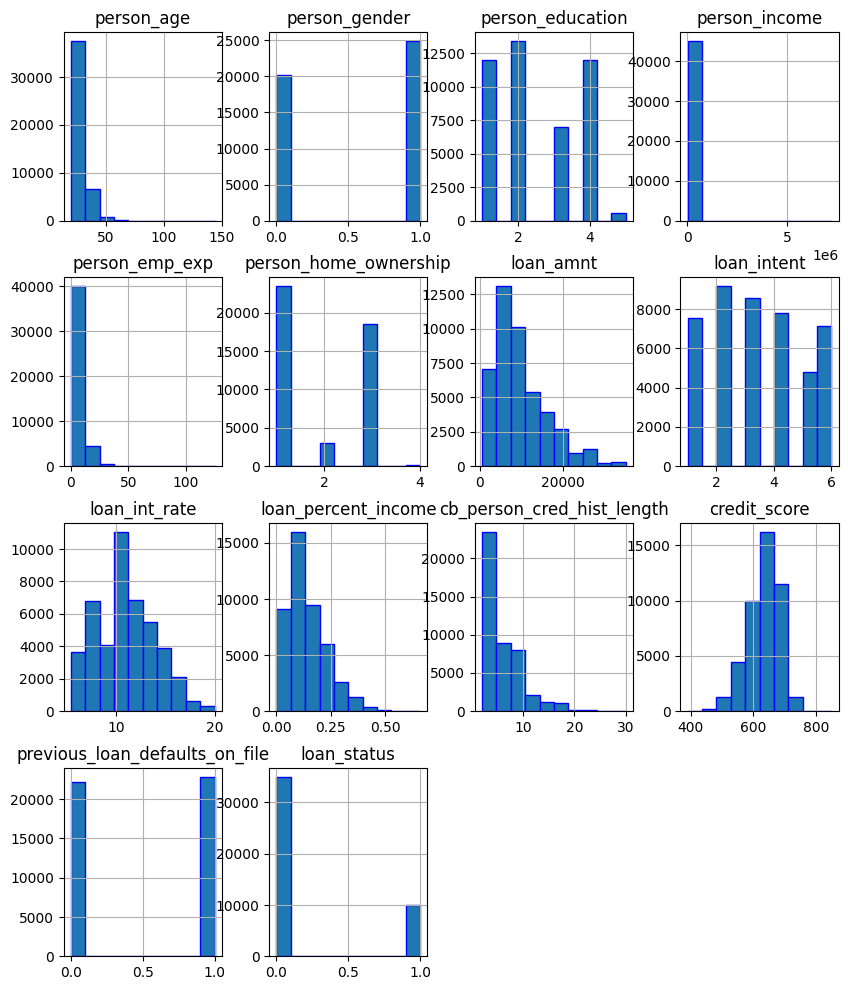

In [847]:
df.hist(edgecolor="b",figsize=[10,12])

This line is used to create a countplot to visualize the distribution of the 'loan_status' variable in your DataFrame df.

<Axes: xlabel='loan_status', ylabel='count'>

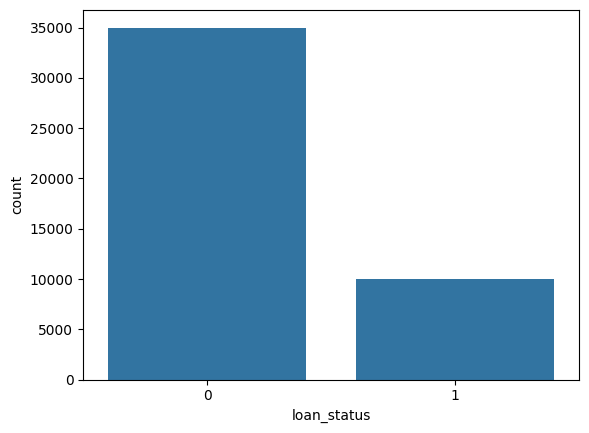

In [848]:
sns.countplot(x="loan_status",data=df)

This code snippet is designed to handle class imbalance in your dataset by using the SMOTE (Synthetic Minority Over-sampling Technique) oversampling method.

In [849]:
from imblearn.over_sampling import RandomOverSampler,SMOTE
from sklearn.model_selection import train_test_split

# Splitting the data into features (X) and target (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Converting categorical columns to numerical (if necessary)
#X = pd.get_dummies(X)

# Splitting into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Applying SMOTE for oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)


X_resampled=pd.DataFrame(X_resampled,columns=X.columns)
y_resampled=pd.Series(y_resampled,name='loan_status')
# concatenate  X_resampled is a DataFrame and y_resampled is series to allow
df=pd.concat([X_resampled,y_resampled],axis=1)
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.000000,0,3,71948.000000,0,1,35000.000000,1,16.020000,0.490000,3.000000,561,0,1
1,21.000000,0,1,12282.000000,0,2,1000.000000,2,11.140000,0.080000,2.000000,504,1,0
2,25.000000,0,1,12438.000000,3,3,5500.000000,3,12.870000,0.440000,3.000000,635,0,1
3,23.000000,0,2,79753.000000,0,1,35000.000000,3,15.230000,0.440000,2.000000,675,0,1
4,24.000000,1,3,66135.000000,1,1,35000.000000,3,14.270000,0.530000,4.000000,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,22.716899,1,3,107047.924647,2,3,8145.209305,4,14.250828,0.077169,3.433798,578,0,1
69996,23.285114,1,1,85503.483600,3,1,14047.518920,2,16.557721,0.160950,2.095038,649,0,1
69997,24.973340,0,3,61021.896750,4,1,16046.963638,5,11.470305,0.262433,2.730005,623,0,1
69998,22.201050,0,1,42114.725474,0,1,1791.555914,2,11.176871,0.040000,2.201050,647,0,1


This code snippet aims to visualize and display the class distribution of your target variable ('loan_status') after applying the SMOTE oversampling technique.

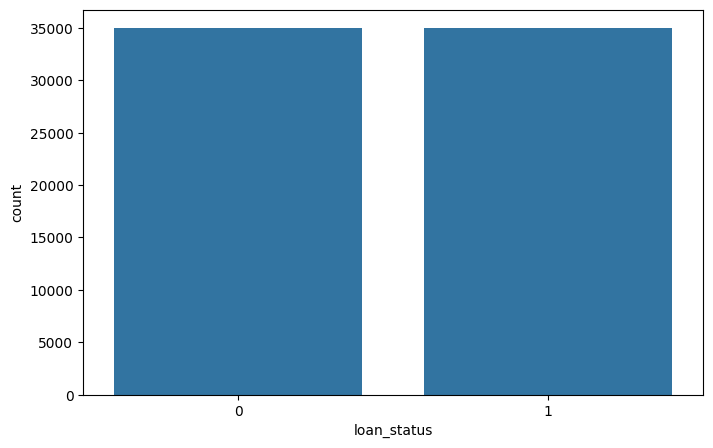

loan_status
1    35000
0    35000
Name: count, dtype: int64


In [850]:
# Plot the class distribution after oversampling
# Convert the oversampled target to a Pandas Series
y_resampled_series = pd.Series(y_resampled)

# Plot the class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=y_resampled_series)
plt.show()

# Display the count of each class
print(y_resampled_series.value_counts())

# Correlation Analysis
A heatmap was generated to understand the correlation between different features:



In [851]:
correlation=df.corr()

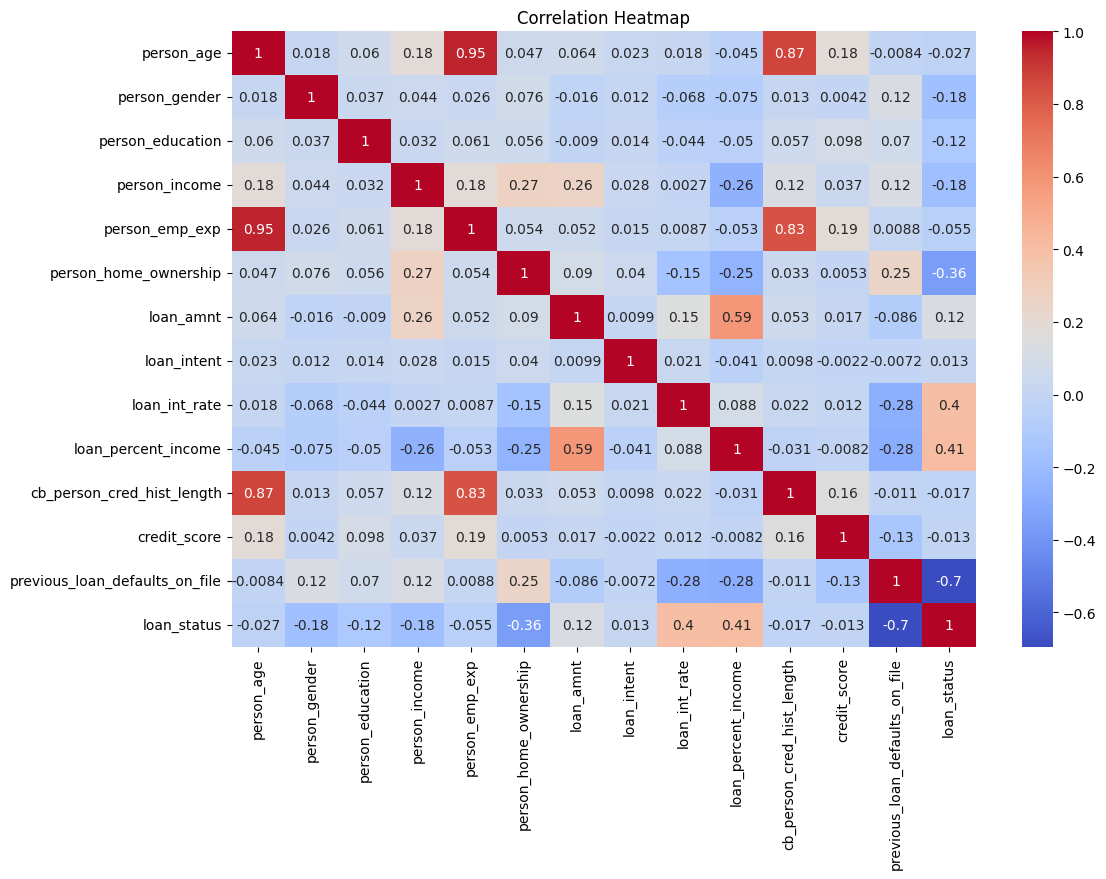

In [852]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True,cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

#  Feature selection

Low-correlation features and those with high skewness were dropped from the dataset:

In [853]:
df.drop(['person_age'], inplace=True, axis=1)
df.drop(['person_gender'], inplace=True, axis=1)
df.drop(['person_education'], inplace=True, axis=1)
df.drop(['person_income'], inplace=True, axis=1)
df.drop(['person_emp_exp'], inplace=True, axis=1)
df.drop(['loan_amnt'], inplace=True, axis=1)
df.drop(['loan_intent'], inplace=True, axis=1)
df.drop(['cb_person_cred_hist_length'], inplace=True, axis=1)
df.drop(['credit_score'], inplace=True, axis=1)
df

,person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,1,16.020000,0.490000,0,1
1,2,11.140000,0.080000,1,0
2,3,12.870000,0.440000,0,1
3,1,15.230000,0.440000,0,1
4,1,14.270000,0.530000,0,1
...,...,...,...,...,...
69995,3,14.250828,0.077169,0,1
69996,1,16.557721,0.160950,0,1
69997,1,11.470305,0.262433,0,1
69998,1,11.176871,0.040000,0,1


In [854]:
df.shape

(70000, 5)

In [855]:
df.columns

Index(['person_home_ownership', 'loan_int_rate', 'loan_percent_income',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

# Outlier Detection

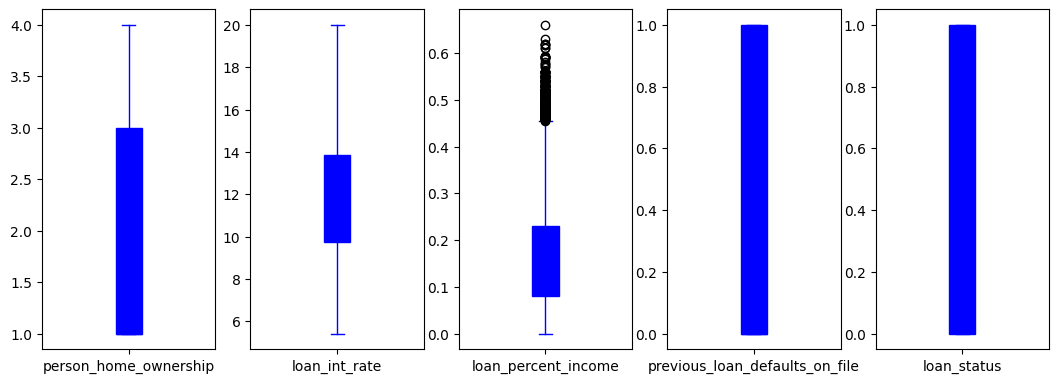

In [856]:
df.plot(kind='box', subplots=True, layout=(3,5), figsize=(13,15), color='blue', patch_artist=True)
plt.show()

# 7. Feature Engineer

This line of code applies a natural logarithm (log base e) transformation to your DataFrame df and stores the result in a new variable called data.

In [857]:
data=np.log(df+1)

This code snippet is designed to visualize the distribution of your log-transformed data using a histogram and a kernel density estimate (KDE) plot. It utilizes the matplotlib.pyplot and seaborn libraries for plotting.

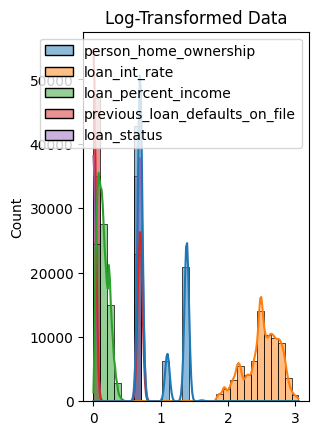

In [858]:
# Plotting log-transformed data distribution
plt.subplot(1,2,2)
sns.histplot(data, bins=30, kde=True)
plt.title("Log-Transformed Data")
plt.show()

This code aims to visualize the distribution of each feature in your dataset data after a log transformation has been applied. It uses seaborn and matplotlib libraries for plotting.

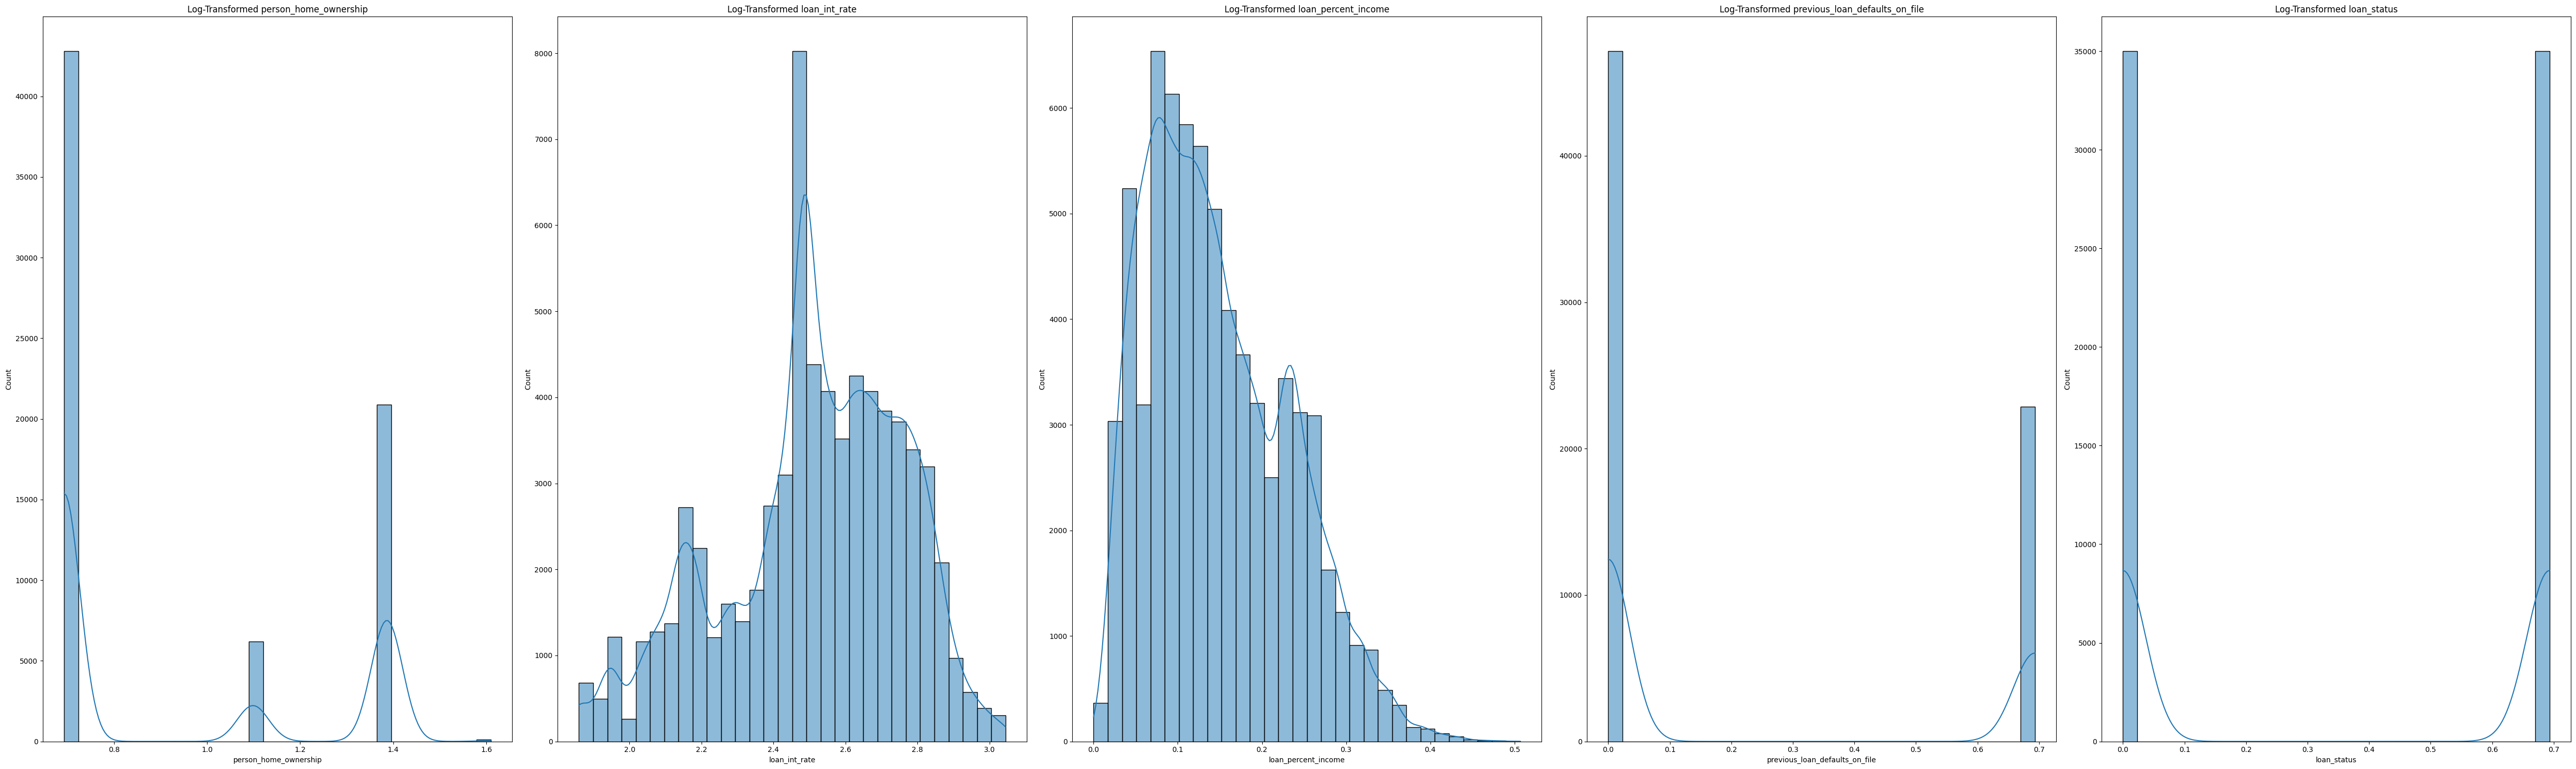

In [859]:
# Assuming df is a DataFrame with multiple features
num_features = data.shape[1]  # Number of features
plt.figure(figsize=(50, 15))  # Adjust the figure size as needed

for i, column in enumerate(data.columns, 1):
    plt.subplot(1, num_features, i)  # Adjust layout for each feature
    sns.histplot(data[column], bins=30, kde=True)
    plt.title(f"Log-Transformed {column}")

plt.tight_layout()
plt.show()

# 8. Dimensionally Reduction

In [860]:
data['loan_status']= (data['loan_status'] > 0.5).astype(int)
x=[['person_home_ownership', 'loan_int_rate', 'loan_percent_income',
       'previous_loan_defaults_on_file']]
y=["loan_status"]

# 10. Initial Modeling And Hypothesis Testing

In [861]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import RandomForestClassifier

This line of code is used to split the data into training and testing sets for your machine learning model.

In [863]:
x = data[['person_home_ownership', 'loan_int_rate', 'loan_percent_income', 'previous_loan_defaults_on_file']]
y = data['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

These lines of code are crucial for creating and training your Random Forest Classifier model.

In [864]:
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

This code is used to generate predictions on the test data using your trained Random Forest Classifier model.

In [865]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 0, ..., 0, 1, 1])

This code snippet is used to create and visualize a confusion matrix to evaluate the performance of your classification model.

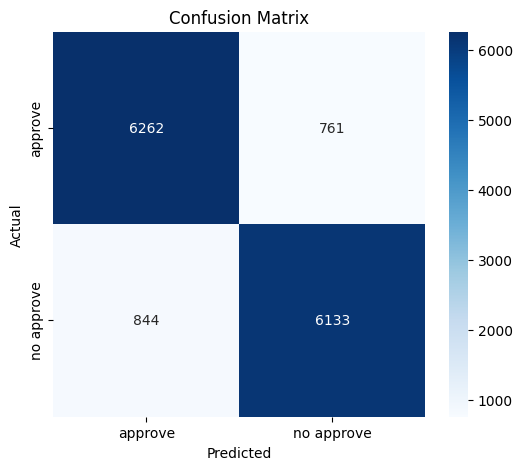

In [871]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['approve', 'no approve'], yticklabels=['approve', 'no approve'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

This line imports functions from the sklearn.metrics module that are used to evaluate the performance of a classification model.

In [867]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, accuracy_score

This code snippet calculates and prints the accuracy, precision, recall, and F1 score of your classification model to evaluate its performance.

In [868]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.8853571428571428
Precision: 0.8896141572381782
Recall: 0.8790311021929196
F1 Score: 0.8842909667651936


This code snippet is designed to take user input for four features (person_home_ownership, loan_int_rate, loan_percent_income, and previous_loan_defaults_on_file) and then use a trained Random Forest Classifier model (model) to predict the loan status (loan).

In [870]:
person_home_ownership=float(input("Enter person_home_ownership: "))
loan_int_rate=float(input("Enter loan_int_rate: "))
loan_percent_income=float(input("Enter loan_percent_income: "))
previous_loan_defaults_on_file=float(input("Enter previous_loan_defaults_on_file: "))
user_input=[[person_home_ownership,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file]]
loan=model.predict(user_input)
print("loan:",loan)

Enter person_home_ownership: 7
Enter loan_int_rate: 6
Enter loan_percent_income: 5
Enter previous_loan_defaults_on_file: 6
loan: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
